## How to determine the likelihood two distributions came from the same population

- The interview question showed a chart of two distributions of descent rates in feet per minute, and the question was: what statistical test can be used to determine the probability the two groups came from the same population.
- BLUF (Bottom Line Up Front): we should use a two-sample, two-tailed t-test because we're comparing two observed means of independent samples for difference
- See below for my attempt to recreate the chart from the question and to run the statistics test

In [1]:
# IMPORTS
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)

### Make two distribution objects and generate 10,000 simulated observations of the descent rate at 1000' AGL
- I'm estimating the mean and standard deviation from my memory of the chart
-  And I'm assuming normal distribution for this, but I believe there was a slight right skew on one or both

In [66]:
# set mean and std for first distribution (lower mean of the two)
mu1 = 750
sigma1 = 250

# set mean and std for second distribution (higher mean of the two, with greater std)
mu2 = 1300
sigma2 = 400

# set number of observations to simulate
n = 10_000

# make the two normal distribution objects
vvi_dist_1 = stats.norm(mu1, sigma1)
vvi_dist_2 = stats.norm(mu2, sigma2)

In [29]:
# Next generate n values for each distribution
vvi_1_values = vvi_dist_1.rvs(n)
vvi_2_values = vvi_dist_2.rvs(n)

# exclude values < 0 OR > 5000
vvi_1_values = np.clip(vvi_1_values, 0, 5000)
vvi_2_values = np.clip(vvi_2_values, 0, 5000)

## Visualize the distributions

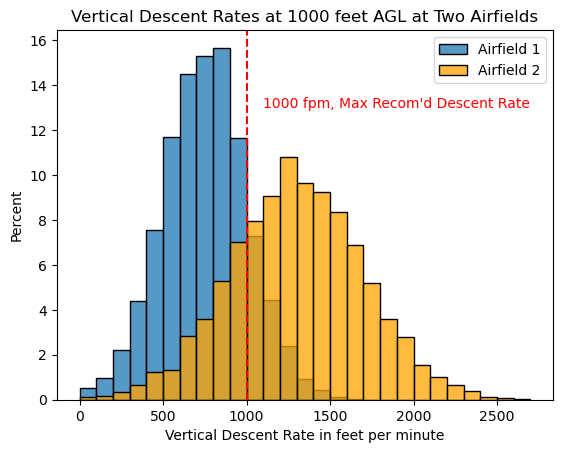

In [65]:
# Plot the two distributions
sns.histplot(vvi_1_values, binwidth=100, stat='percent', label='Airfield 1')
sns.histplot(vvi_2_values, binwidth=100, stat='percent', label='Airfield 2', color='orange')
plt.title('Vertical Descent Rates at 1000 feet AGL at Two Airfields')
plt.legend()
plt.axvline(1000, color='red', linestyle='--')
plt.annotate("1000 fpm, Max Recom'd Descent Rate", xy=(1100,13), color='red')
plt.xlabel('Vertical Descent Rate in feet per minute')
plt.show()

## Analyze Descent Rates from Airfield1 vs Airfield2
- $H_0$ There is NO difference in the means of Airfield1 and Airfield2
- $H_a$ There IS a difference
- $\alpha$ = .05

Comparing two observed means (independent samples) for difference (not if one is higher than the other) => two-sample, two-tailed t-test

### Verify Assumptions for t-test:
- Independent: Yes
- Normal Distribution: Yes
- Equal Variances: Check with Levene Test...

### Levene Test to Check for Equal Variance
- Hypothesis
    - $H_0$ There is no difference in the variances of Airfield1 and 2
    - $H_a$ There is a difference
    - $\alpha$ = .05

In [70]:
# Get levene test results
stats.levene(vvi_1_values, vvi_2_values)

LeveneResult(statistic=1653.7752956433442, pvalue=0.0)

- Since p < alpha, we can reject the null hypothesis. The variances are not equal
- We will set the equal variance flag to False (which actually invokes Welch's t-test per the documentation)

In [72]:
# Get t-test results
stats.ttest_ind(vvi_1_values, vvi_2_values, equal_var=False)

Ttest_indResult(statistic=-116.29668302098297, pvalue=0.0)

## Summarize
- p is < .05, so we can reject the null hypothesis which suggests the $H_a$
- In summary, these two sample distributions are most likely from different population groups